# COMPARE HSP2 TO HSPF USING CALLEG

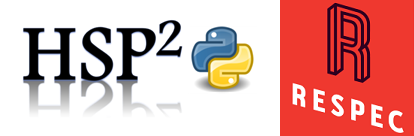

Copyright 2020 for this Jupyter Notebook and YouTube Video by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2020 by RESPEC INC. and released under the *GNU AFFERO GENERAL PUBLIC LICENSE*

This Notebook will compare the results of running HSPF and HSP$^2$ for the basic hydrology (PWATER, IWATER, and HYDR) to confirm the proper calculations of HSP$^2$

Calleg is a real watershed and has
+ 27 IMPLND segments,
+ 129 PERLND segments,
+ 119 RCHRES segments,
+ 9 years of simulation time with hourly time steps (78,888 timesteps) from 1993-10-01 to 2002-10-01

This Notebook assumes HSPF has been run and the HBN data saved to an HDF5 file in the **HSPF RUN** directory.

## Required Python imports  and setup

In [1]:
from matplotlib import pyplot as plt
from pandas import DataFrame, options, read_hdf

# Set display options for convenience, does't change the data
options.display.max_rows = 150
options.display.max_columns = 20
options.display.float_format = (
    "{:.4f}".format
)  # display 4 digits after the decimal point

%matplotlib inline

from HSP2 import main, versions
from HSP2tools import readUCI, readWDM

versions(["matplotlib"])

,version
Python,"3.10.14 | packaged by conda-forge | (main, Mar..."
HSP2,0.11.0a1
numpy,1.26.4
numba,0.59.1
pandas,2.2.2
matplotlib,3.8.4
os,Linux-5.15.0-91-generic-x86_64-with-glibc2.35
processor,x86_64
Date/Time,2024-04-25 21:33:49


Convenient name strings to get to the data

In [2]:
wdmname = "calleg.wdm"
uciname = "calleg.uci"
HBN = "hspf.h5"
hdfname = "calleg_hsp2_devWDM.h5"

## Run HSP2 on the calleg

### Create HDF5 file

In [3]:
%time
readUCI(uciname, hdfname)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:370: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  + Timedelta(int(d['SHR']), 'h') + Timedelta(int(d['SMI']), 'T'))[0:16]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:372: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  + Timedelta(int(d['EHR']), 'h') + Timedelta(int(d['EMI']), 'T'))[0:16]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version.

ACTIVITY
PRINT-INFO
BINARY-INFO
GEN-INFO
PWAT-PARM1
PWAT-PARM2
PWAT-PARM3
PWAT-PARM4
MON-INTERCEP
MON-UZSN
MON-LZETPARM
PWAT-STATE1


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore'

ACTIVITY
PRINT-INFO
BINARY-INFO
GEN-INFO
IWAT-PARM1
IWAT-PARM2
IWAT-STATE1


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore'

ACTIVITY
PRINT-INFO
BINARY-INFO
GEN-INFO
HYDR-PARM1
HYDR-PARM2
HYDR-INIT


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(to_numeric, errors='ignore')
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readUCI.py:95: FutureWarning: errors='ignore'

In [4]:
%time
readWDM(wdmname, hdfname)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
401 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

402 reading from wdm
403 reading from wdm
404 reading from wdm
405 reading from wdm
406 reading from wdm
407 reading from wdm
408 reading from wdm
301 reading from wdm
322 reading from wdm
303 reading from wdm
304 reading from wdm
305 reading from wdm
306 reading from wdm
307 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a futu

312 reading from wdm
313 reading from wdm
1802 reading from wdm
1005 reading from wdm
1011 reading from wdm
776 reading from wdm
780 reading from wdm
781 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

782 reading from wdm
800 reading from wdm
802 reading from wdm
803 reading from wdm
805 reading from wdm
806 reading from wdm
841 reading from wdm
778 reading from wdm
830 reading from wdm
831 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

832 reading from wdm
833 reading from wdm
834 reading from wdm
836 reading from wdm
838 reading from wdm
839 reading from wdm
1169 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)


1171 reading from wdm
1239 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

1000 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

49 reading from wdm
141 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

154 reading from wdm
175 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

177 reading from wdm
187 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

188 reading from wdm
234 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

238 reading from wdm
249 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

259 reading from wdm
168 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)


169 reading from wdm
190 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

193 reading from wdm
194 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

196 reading from wdm
227 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

9306 reading from wdm
250 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

321 reading from wdm
302 reading from wdm
323 reading from wdm
324 reading from wdm
325 reading from wdm
8700 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)


7021 reading from wdm
9202 reading from wdm
9101 reading from wdm
9809 reading from wdm
8300 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a futu

7029 reading from wdm
7020 reading from wdm
7053 reading from wdm
7065 reading from wdm
9501 reading from wdm
7057 reading from wdm
7011 reading from wdm
8100 reading from wdm
9402 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

311 reading from wdm
9909 reading from wdm
6141 reading from wdm
6175 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

6177 reading from wdm
6190 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

6194 reading from wdm
6049 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

6238 reading from wdm
6250 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

6001 reading from wdm
6259 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

9701 reading from wdm
7034 reading from wdm
9502 reading from wdm
242 reading from wdm
9916 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

7001 reading from wdm
335 reading from wdm
9913 reading from wdm
7017 reading from wdm
9207 reading from wdm
9504 reading from wdm
9702 reading from wdm
9804 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

9109 reading from wdm
9906 reading from wdm
7018 reading from wdm
1311 reading from wdm
7014 reading from wdm
1776 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

1780 reading from wdm
1800 reading from wdm
1805 reading from wdm
1806 reading from wdm
5803 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

1841 reading from wdm
7031 reading from wdm
7013 reading from wdm
9703 reading from wdm
9602 reading from wdm
9904 reading from wdm
7016 reading from wdm
7026 reading from wdm
9102 reading from wdm
9805 reading from wdm
9106 reading from wdm
9803 reading from wdm
9706 reading from wdm
8500 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsnam

2239 reading from wdm
7027 reading from wdm
7012 reading from wdm
9707 reading from wdm
9912 reading from wdm
7051 reading from wdm
8600 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

9209 reading from wdm
9705 reading from wdm
9206 reading from wdm
9806 reading from wdm
9600 reading from wdm
9509 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

9208 reading from wdm
9505 reading from wdm
8200 reading from wdm
7002 reading from wdm
9917 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

7019 reading from wdm
9304 reading from wdm
9603 reading from wdm
7023 reading from wdm
9901 reading from wdm
9305 reading from wdm
7025 reading from wdm
9406 reading from wdm
7058 reading from wdm
9915 reading from wdm
9608 reading from wdm
9704 reading from wdm
9108 reading from wdm
7062 reading from wdm
9104 reading from wdm
9400 reading from wdm
9914 reading from wdm
7028 reading from wdm
9200 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

9105 reading from wdm
7004 reading from wdm
9903 reading from wdm
9506 reading from wdm
8400 reading from wdm
9308 reading from wdm
7024 reading from wdm
9918 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

7052 reading from wdm
9708 reading from wdm
7063 reading from wdm
9405 reading from wdm
9503 reading from wdm
7015 reading from wdm
9307 reading from wdm
9500 reading from wdm
9604 reading from wdm
9407 reading from wdm
9601 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

7022 reading from wdm
9907 reading from wdm
9507 reading from wdm
9309 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a futu

7055 reading from wdm
9203 reading from wdm
9607 reading from wdm
7030 reading from wdm
9300 reading from wdm
9401 reading from wdm
1018 reading from wdm
9709 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

7054 reading from wdm
9801 reading from wdm
9302 reading from wdm
8800 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a futu

9908 reading from wdm
9605 reading from wdm
9609 reading from wdm
9303 reading from wdm
9905 reading from wdm
9902 reading from wdm
7056 reading from wdm
7003 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

7033 reading from wdm
7061 reading from wdm
9508 reading from wdm
9404 reading from wdm
9808 reading from wdm
9807 reading from wdm
7059 reading from wdm
9205 reading from wdm
9606 reading from wdm
9201 reading from wdm
9910 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments 

7060 reading from wdm
9107 reading from wdm
9408 reading from wdm
7064 reading from wdm
9103 reading from wdm
7032 reading from wdm
9301 reading from wdm
9919 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

9100 reading from wdm
9204 reading from wdm
9911 reading from wdm
9403 reading from wdm
9409 reading from wdm


/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:138: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  series.index.freq = str(tstep) + freq[tcode]
/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' w

9802 reading from wdm
1017 reading from wdm
1004 reading from wdm
1010 reading from wdm
1016 reading from wdm
1003 reading from wdm
1009 reading from wdm
1015 reading from wdm
1002 reading from wdm
1008 reading from wdm
1014 reading from wdm
1007 reading from wdm
1001 reading from wdm
1013 reading from wdm
1006 reading from wdm
1012 reading from wdm
1019 reading from wdm
1020 reading from wdm
1021 reading from wdm
1022 reading from wdm
1023 reading from wdm
1024 reading from wdm
1025 reading from wdm
1026 reading from wdm
1027 reading from wdm
1028 reading from wdm
1029 reading from wdm
1030 reading from wdm
1031 reading from wdm
1032 reading from wdm
1033 reading from wdm
1034 reading from wdm
1035 reading from wdm
1036 reading from wdm
1037 reading from wdm
1038 reading from wdm
1039 reading from wdm
1040 reading from wdm
1041 reading from wdm
1042 reading from wdm
1043 reading from wdm
1044 reading from wdm
1045 reading from wdm
1046 reading from wdm
1047 reading from wdm
1048 readi

/home/tim/anaconda3/envs/hsp2_310/lib/python3.10/site-packages/HSP2tools/readWDM.py:146: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  series.to_hdf(store, dsname, format='t', data_columns=True)


1297 reading from wdm
1298 reading from wdm
1299 reading from wdm


,Start,Stop,Freq,Length,TSTYPE,TFILL,STNAM,SCENARIO,CONSTITUENT,LOCATION
TS401,1987-01-01 00:00:00,2004-01-01 00:00:00,1MS,204,PUMP,-999.0000,Cumulative Flow of 6 Downtown GW Wells,OBSERVED,PUMPOUT,DOWNTOWN
TS402,1987-01-01 00:00:00,2004-01-01 00:00:00,1MS,204,PUMP,-999.0000,Flow of GW pumped into storm drain by Pump #31 i,OBSERVED,PUMPOUT,PUMP_#31
TS403,1987-01-01 00:00:00,2004-01-01 00:00:00,1MS,204,PUMP,-999.0000,Flow of GW pumped into storm drain @ 2020 First,OBSERVED,PUMPIN,2020_1ST
TS404,1987-01-01 00:00:00,2004-01-01 00:00:00,1MS,204,PUMP,-999.0000,Flow of GW pumped into storm drain @ Chain Dr in,OBSERVED,PUMPIN,CHAIN_DR
TS405,1987-01-01 00:00:00,2004-01-01 00:00:00,1MS,204,PUMP,-999.0000,Flow of GW pumped into storm drain @ Madera in S,OBSERVED,PUMPIN,MADERA
...,...,...,...,...,...,...,...,...,...,...
TS9204,1987-01-01 00:00:00,2003-01-01 00:00:00,1D,5844,AGWO,-999.0000,,CALLEG,AGWO,MADERA
TS9911,1987-01-01 00:00:00,2003-01-01 00:00:00,1D,5844,FLOW,-999.0000,,CALLEG,FLOW,ARROY838
TS9403,1987-01-01 00:00:00,2003-01-01 00:00:00,1D,5844,IFWO,-999.0000,,CALLEG,IFWO,REVOLON
TS9409,1987-01-01 00:00:00,2003-01-01 00:00:00,1H,140256,WPPT,-999.0000,,CALLEG,WPPT,REVOLON


### Run

Using profiler

Normal run

In [5]:
main(hdfname, saveall=True)

2024-04-25 21:34:12.20   Processing started for file calleg_hsp2_devWDM.h5; saveall=True
2024-04-25 21:34:16.83   Simulation Start: 1993-10-01 00:00:00, Stop: 2002-10-01 00:00:00
2024-04-25 21:34:16.83      PERLND P011 DELT(minutes): 60
2024-04-25 21:34:18.24         PWATER
2024-04-25 21:34:23.54      PERLND P012 DELT(minutes): 60
2024-04-25 21:34:23.55         PWATER
2024-04-25 21:34:23.97      PERLND P013 DELT(minutes): 60
2024-04-25 21:34:23.97         PWATER
2024-04-25 21:34:24.38      PERLND P014 DELT(minutes): 60
2024-04-25 21:34:24.38         PWATER
2024-04-25 21:34:24.80      PERLND P015 DELT(minutes): 60
2024-04-25 21:34:24.80         PWATER
2024-04-25 21:34:25.21      IMPLND I011 DELT(minutes): 60
2024-04-25 21:34:25.22         IWATER
2024-04-25 21:34:26.65      PERLND P021 DELT(minutes): 60
2024-04-25 21:34:26.65         PWATER
2024-04-25 21:34:27.08      PERLND P022 DELT(minutes): 60
2024-04-25 21:34:27.08         PWATER
2024-04-25 21:34:27.49      PERLND P023 DELT(minutes)

## Read Summary from HBN file

Find the higest frequency data available.

In [6]:
summary = read_hdf(HBN, "SUMMARY")
summary.Frequency.unique()

array(['Monthly', 'Yearly'], dtype=object)

So the best available is monthly data.

## Automate checking by output flow

In [7]:
def hsp2key(hspfkey):
    op, activity, segment, _ = hspfkey.split("_")
    return f"RESULTS/{op}_{op[0]}{segment:0>3s}/{activity}"

In [8]:
def monthlyoutflow(keys, flowname):
    data = DataFrame()
    for key in keys.index:
        hsp2 = read_hdf(hdfname, hsp2key(key))[flowname].resample("M").sum().to_numpy()
        hspf = read_hdf(HBN, key)[flowname].to_numpy()

        hsp2sum = hsp2.sum()
        hspfsum = hspf.sum()

        segment = key.split("_")[2]

        data.loc[segment, "HSP2 SUM"] = hsp2.sum()
        data.loc[segment, "HSPF SUM"] = hspf.sum()
        data.loc[segment, "Percent diff"] = 100.0 * (hspfsum - hsp2sum) / hspfsum
        data.loc[segment, "abs(Percent diff)"] = (
            100.0 * abs(hspfsum - hsp2sum) / hspfsum
        )

    return data.sort_values(by=["abs(Percent diff)"])

### Define a function to plot HSPF and HSP2 data

In [9]:
def plot(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample("M").sum().shift(1, "D")
    elif how == "last":
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample("M").last().shift(1, "D")

    plt.figure(figsize=(10, 8))
    plt.plot(tshspf.index, tshspf, label="HSPF", color="r")
    plt.plot(tshsp2.index, tshsp2, label="HSP2", color="b")
    plt.legend()
    plt.title(f"{operation} {operation[0]}{ils:0>3s}, {activity} {name}")

In [10]:
def scatter(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample("M").sum().shift(1, "D")
    elif how == "last":
        tshsp2 = read_hdf(hdfname, hsp2)[name].resample("M").last().shift(1, "D")

    plt.scatter(tshspf, tshsp2)

### IMPLND

In [11]:
implndkeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "IMPLND")]
implndkeys

,Operation,Activity,segment,Frequency,Shape,Start,Stop
IMPLND_IWATER_011_4,IMPLND,IWATER,11,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_021_4,IMPLND,IWATER,21,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_041_4,IMPLND,IWATER,41,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_051_4,IMPLND,IWATER,51,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_061_4,IMPLND,IWATER,61,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_071_4,IMPLND,IWATER,71,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_081_4,IMPLND,IWATER,81,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_101_4,IMPLND,IWATER,101,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_111_4,IMPLND,IWATER,111,Monthly,"(108, 6)",1993-11-01,2002-10-01
IMPLND_IWATER_121_4,IMPLND,IWATER,121,Monthly,"(108, 6)",1993-11-01,2002-10-01


In [12]:
delta = monthlyoutflow(implndkeys, "SURO")
delta

KeyError: 'SURO'

Look at the statistics for the percent difference column

In [ ]:
delta.describe()

In [ ]:
delta["Percent diff"].hist()

In [ ]:
ils = delta.index[-1]
print("WORST IMPLND SEGMENT IS", ils)

#### IMPLND IWATER SURO, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "SURO", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "SURO", "sum")

#### IMPLND IWATER IMPEV, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "IMPEV", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "IMPEV", "sum")

#### IMPLND IWATER PET, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "PET", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "PET", "sum")

#### IMPLND IWATER RETS, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "RETS", "last")

In [ ]:
scatter("IMPLND", ils, "IWATER", "RETS", "last")

#### IMPLND IWATER SUPY, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "SUPY", "sum")

In [ ]:
scatter("IMPLND", ils, "IWATER", "SUPY", "sum")

#### IMPLND IWATER SURS, Monthly

In [ ]:
plot("IMPLND", ils, "IWATER", "SURS", "last")

In [ ]:
scatter("IMPLND", ils, "IWATER", "SURS", "last")

## Automate checking PERLNDs for PERO

In [ ]:
perlndkeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "PERLND")]
perlndkeys[0:10]

In [ ]:
delta = monthlyoutflow(perlndkeys, "PERO")
delta

Look at the statistics for the percent difference column

In [ ]:
delta.describe()

In [ ]:
delta["Percent diff"].hist()

In [ ]:
pls = delta.index[-1]
print("WORST PERLND SEGMENT IS", pls)

#### PERLND PWATER AGWLI

In [ ]:
plot("PERLND", pls, "PWATER", "AGWLI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "AGWLI", "sum")

#### PERLND PWATER SURLI

In [ ]:
plot("PERLND", pls, "PWATER", "SURLI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "SURLI", "sum")

#### PERLND PWATER AGWO

In [ ]:
plot("PERLND", pls, "PWATER", "AGWO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "AGWO", "sum")

#### PERLND PWATER BASET

In [ ]:
plot("PERLND", pls, "PWATER", "BASET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "BASET", "sum")

##### PERLND PWATER CEPE

In [ ]:
plot("PERLND", pls, "PWATER", "CEPE", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "CEPE", "sum")

#### PERLND PWATER IFWI

In [ ]:
plot("PERLND", pls, "PWATER", "IFWI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "IFWI", "sum")

#### PERLND PWATER IFWO

In [ ]:
plot("PERLND", pls, "PWATER", "IFWO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "IFWO", "sum")

#### PERLND PWATER IGWI

In [ ]:
plot("PERLND", pls, "PWATER", "IGWI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "IGWI", "sum")

#### PERLND PWATER INFIL

In [ ]:
plot("PERLND", pls, "PWATER", "INFIL", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "INFIL", "sum")

#### PERLND PWATER LZET

In [ ]:
plot("PERLND", pls, "PWATER", "LZET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "LZET", "sum")

#### PERLND PWATER PERC

In [ ]:
plot("PERLND", pls, "PWATER", "PERC", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "PERC", "sum")

#### PERLND PWATER PERO

In [ ]:
plot("PERLND", pls, "PWATER", "PERO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "PERO", "sum")

#### PERLND PWATER PERS

In [ ]:
plot("PERLND", pls, "PWATER", "PERS", "last")

In [ ]:
scatter("PERLND", pls, "PWATER", "PERS", "last")

#### PERLND PWATER PET, Monthly

In [ ]:
plot("PERLND", pls, "PWATER", "PET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "PET", "sum")

#### PERLND PWATER SUPY

In [ ]:
plot("PERLND", pls, "PWATER", "SUPY", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "SUPY", "sum")

#### PERLND PWATER SURO

In [ ]:
plot("PERLND", pls, "PWATER", "SURO", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "SURO", "sum")

#### PERLND PWATER TAET

In [ ]:
plot("PERLND", pls, "PWATER", "TAET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "TAET", "sum")

#### PERLND PWATER UZET

In [ ]:
plot("PERLND", pls, "PWATER", "UZET", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "UZET", "sum")

#### PERLND PWATER UZI

In [ ]:
plot("PERLND", pls, "PWATER", "UZI", "sum")

In [ ]:
scatter("PERLND", pls, "PWATER", "UZI", "sum")

## RCHRES

In [ ]:
rchreskeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "RCHRES")]
rchreskeys[0:10]

In [ ]:
delta = monthlyoutflow(rchreskeys, "ROVOL")
delta

Look at the statistics for the percent difference column

In [ ]:
delta.describe()

In [ ]:
delta["Percent diff"].hist()

In [ ]:
rid = delta.index[-1]
print("WORST RCHRES SEGMENT IS", rid)

#### RCHRES HYDR IVOL

In [ ]:
plot("RCHRES", rid, "HYDR", "IVOL", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "IVOL", "sum")

#### RCHRES HYDR PRSUPY

In [ ]:
plot("RCHRES", rid, "HYDR", "PRSUPY", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "PRSUPY", "sum")

#### RCHRES HYDR ROVOL

In [ ]:
plot("RCHRES", rid, "HYDR", "ROVOL", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "ROVOL", "sum")

#### RCHRES HYDR VOL

In [ ]:
plot("RCHRES", rid, "HYDR", "VOL", "last")

In [ ]:
scatter("RCHRES", rid, "HYDR", "VOL", "last")

#### RCHRES HYDR VOLEV

In [ ]:
plot("RCHRES", rid, "HYDR", "VOLEV", "sum")

In [ ]:
scatter("RCHRES", rid, "HYDR", "VOLEV", "sum")